## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (6,8)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
dataset = pd.read_csv("Titanic-Dataset.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
dataset['Cabin'].fillna(dataset['Cabin'].mode()[0], inplace=True)

In [8]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
dataset['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
dataset['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

## Data Visualisations

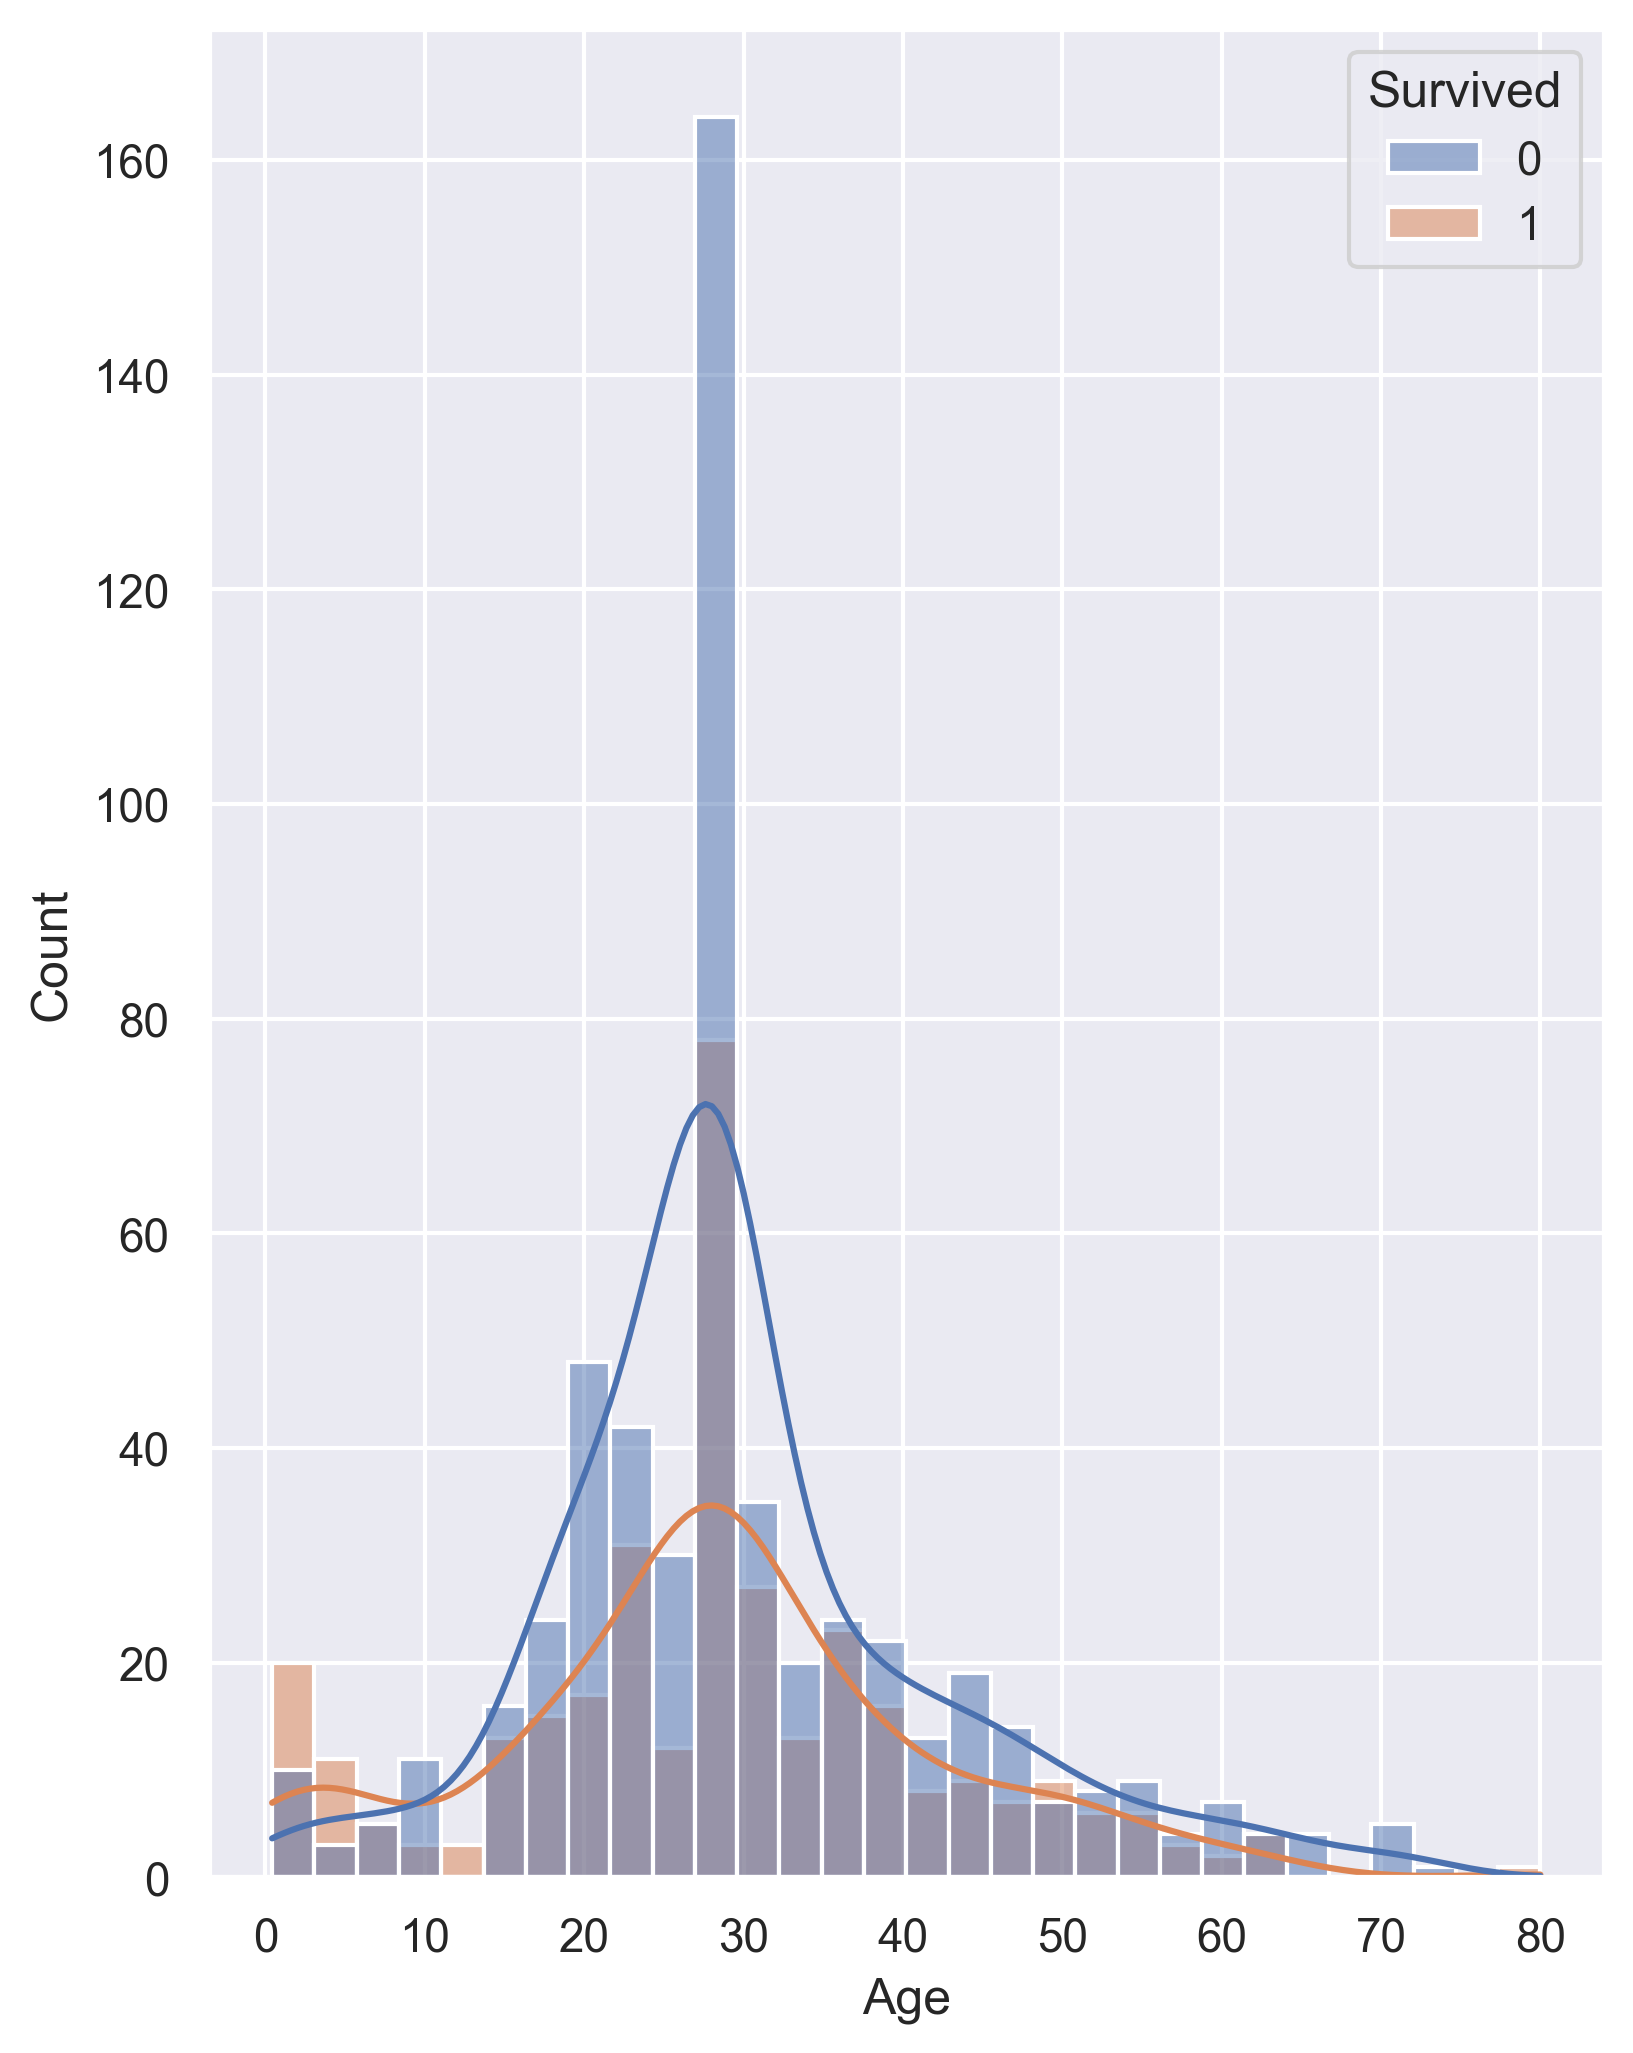

In [14]:
sns.histplot(x='Age',hue='Survived',data=dataset,kde=True)
plt.show()

<Figure size 3000x2400 with 0 Axes>

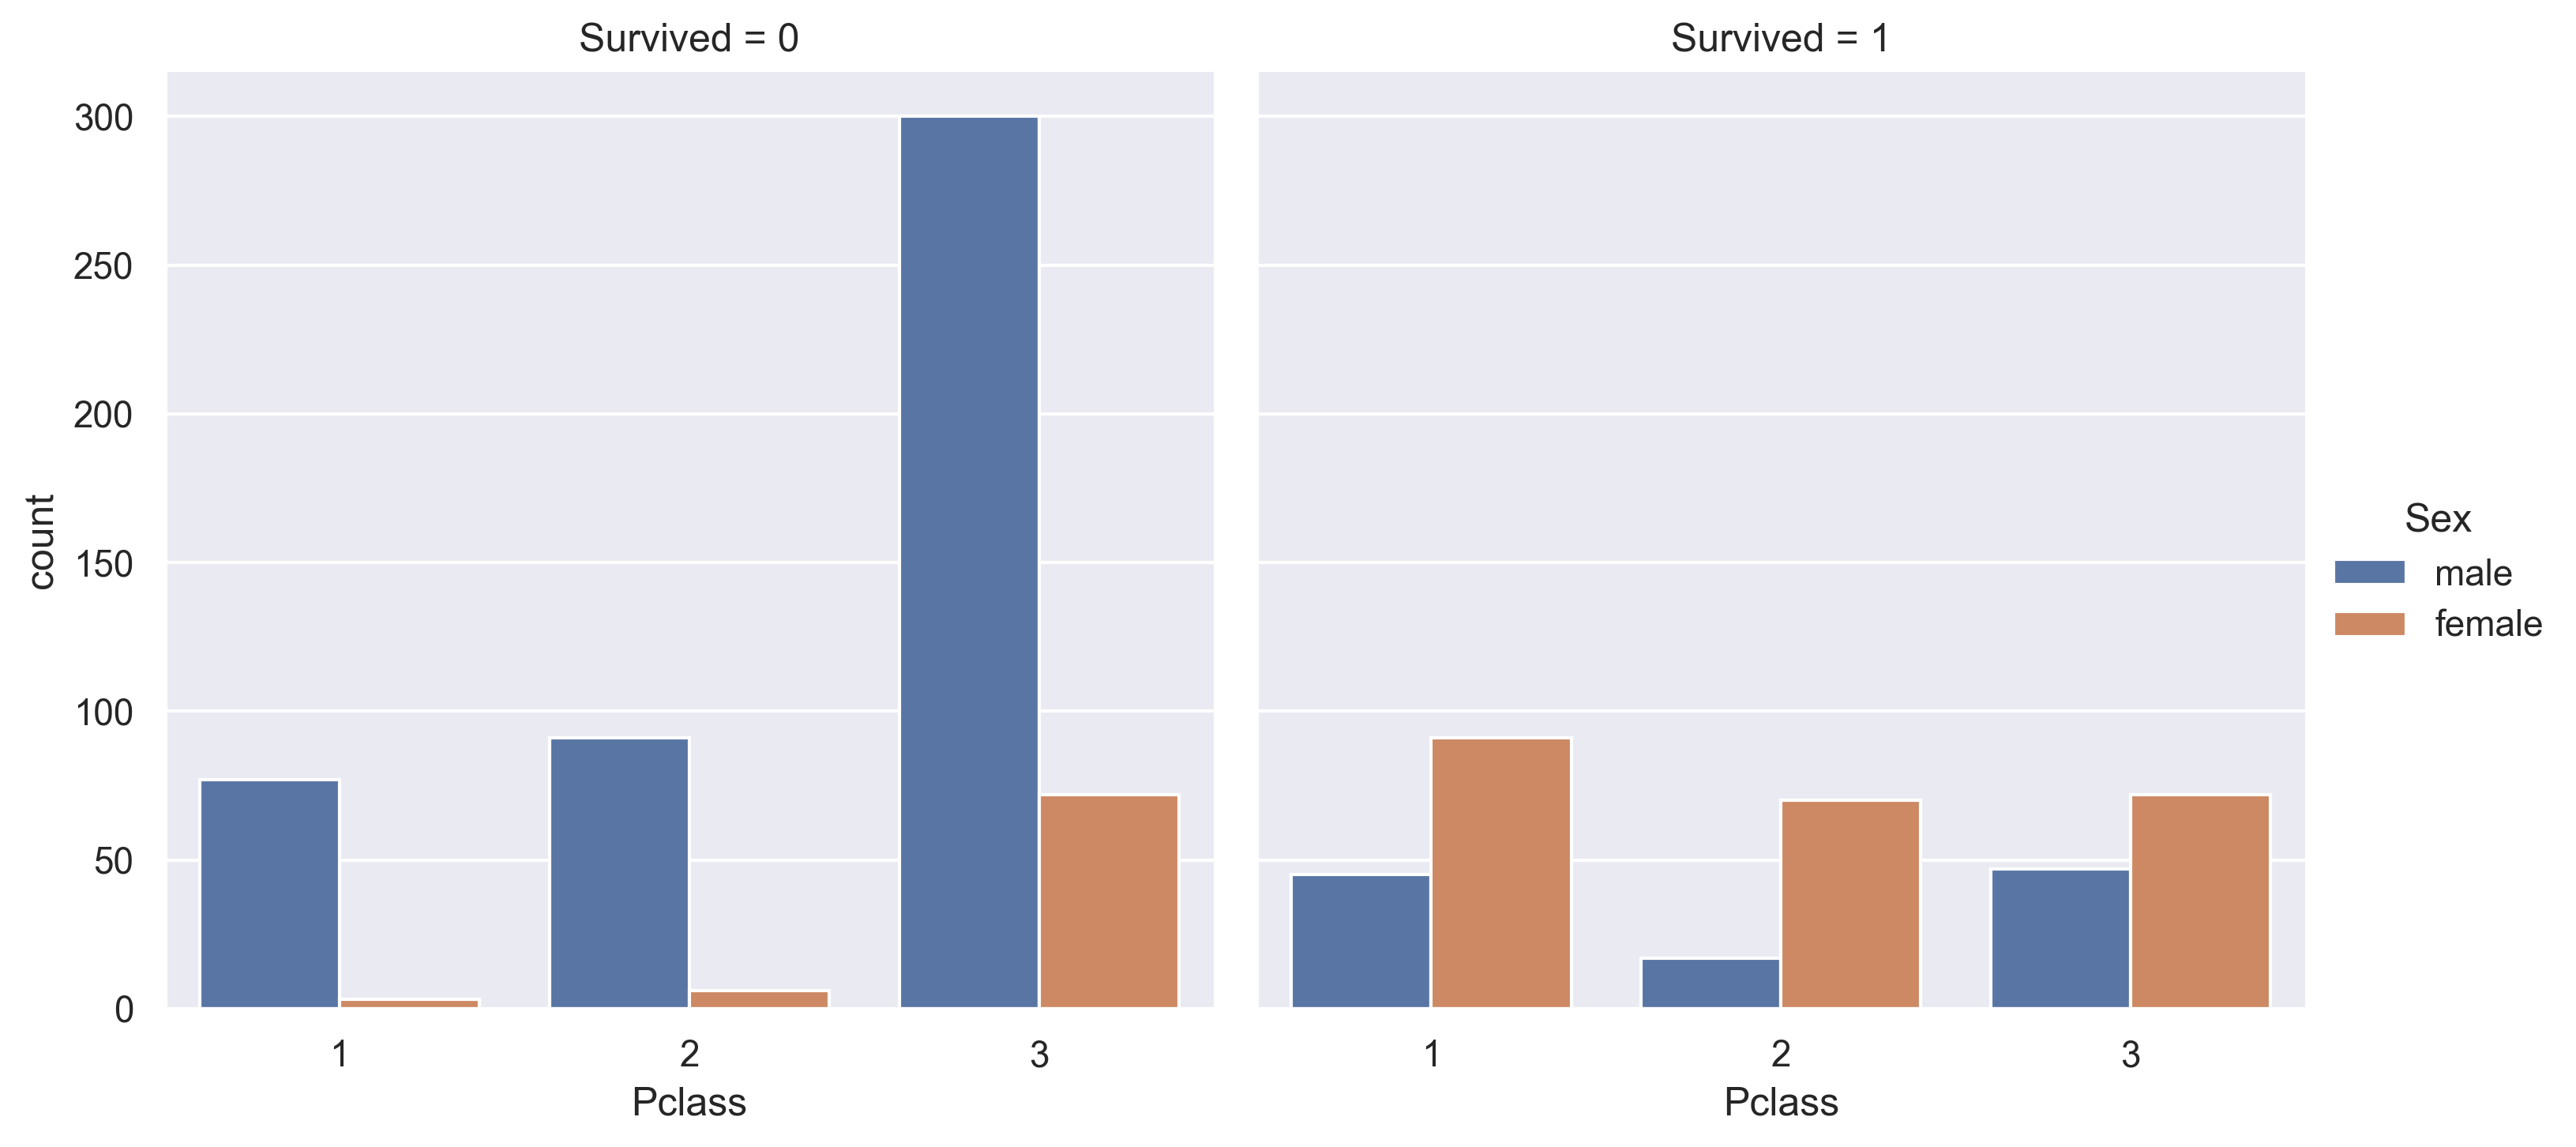

In [15]:
plt.figure(figsize=(10,8))
sns.catplot(x='Pclass',hue='Sex',col='Survived',kind='count',data=dataset)
plt.show()

In [16]:
dataset['Age_group']=pd.cut(dataset['Age'],bins=[0,18,35,50,100],labels=['0-18','19-35','36-50','51+'])

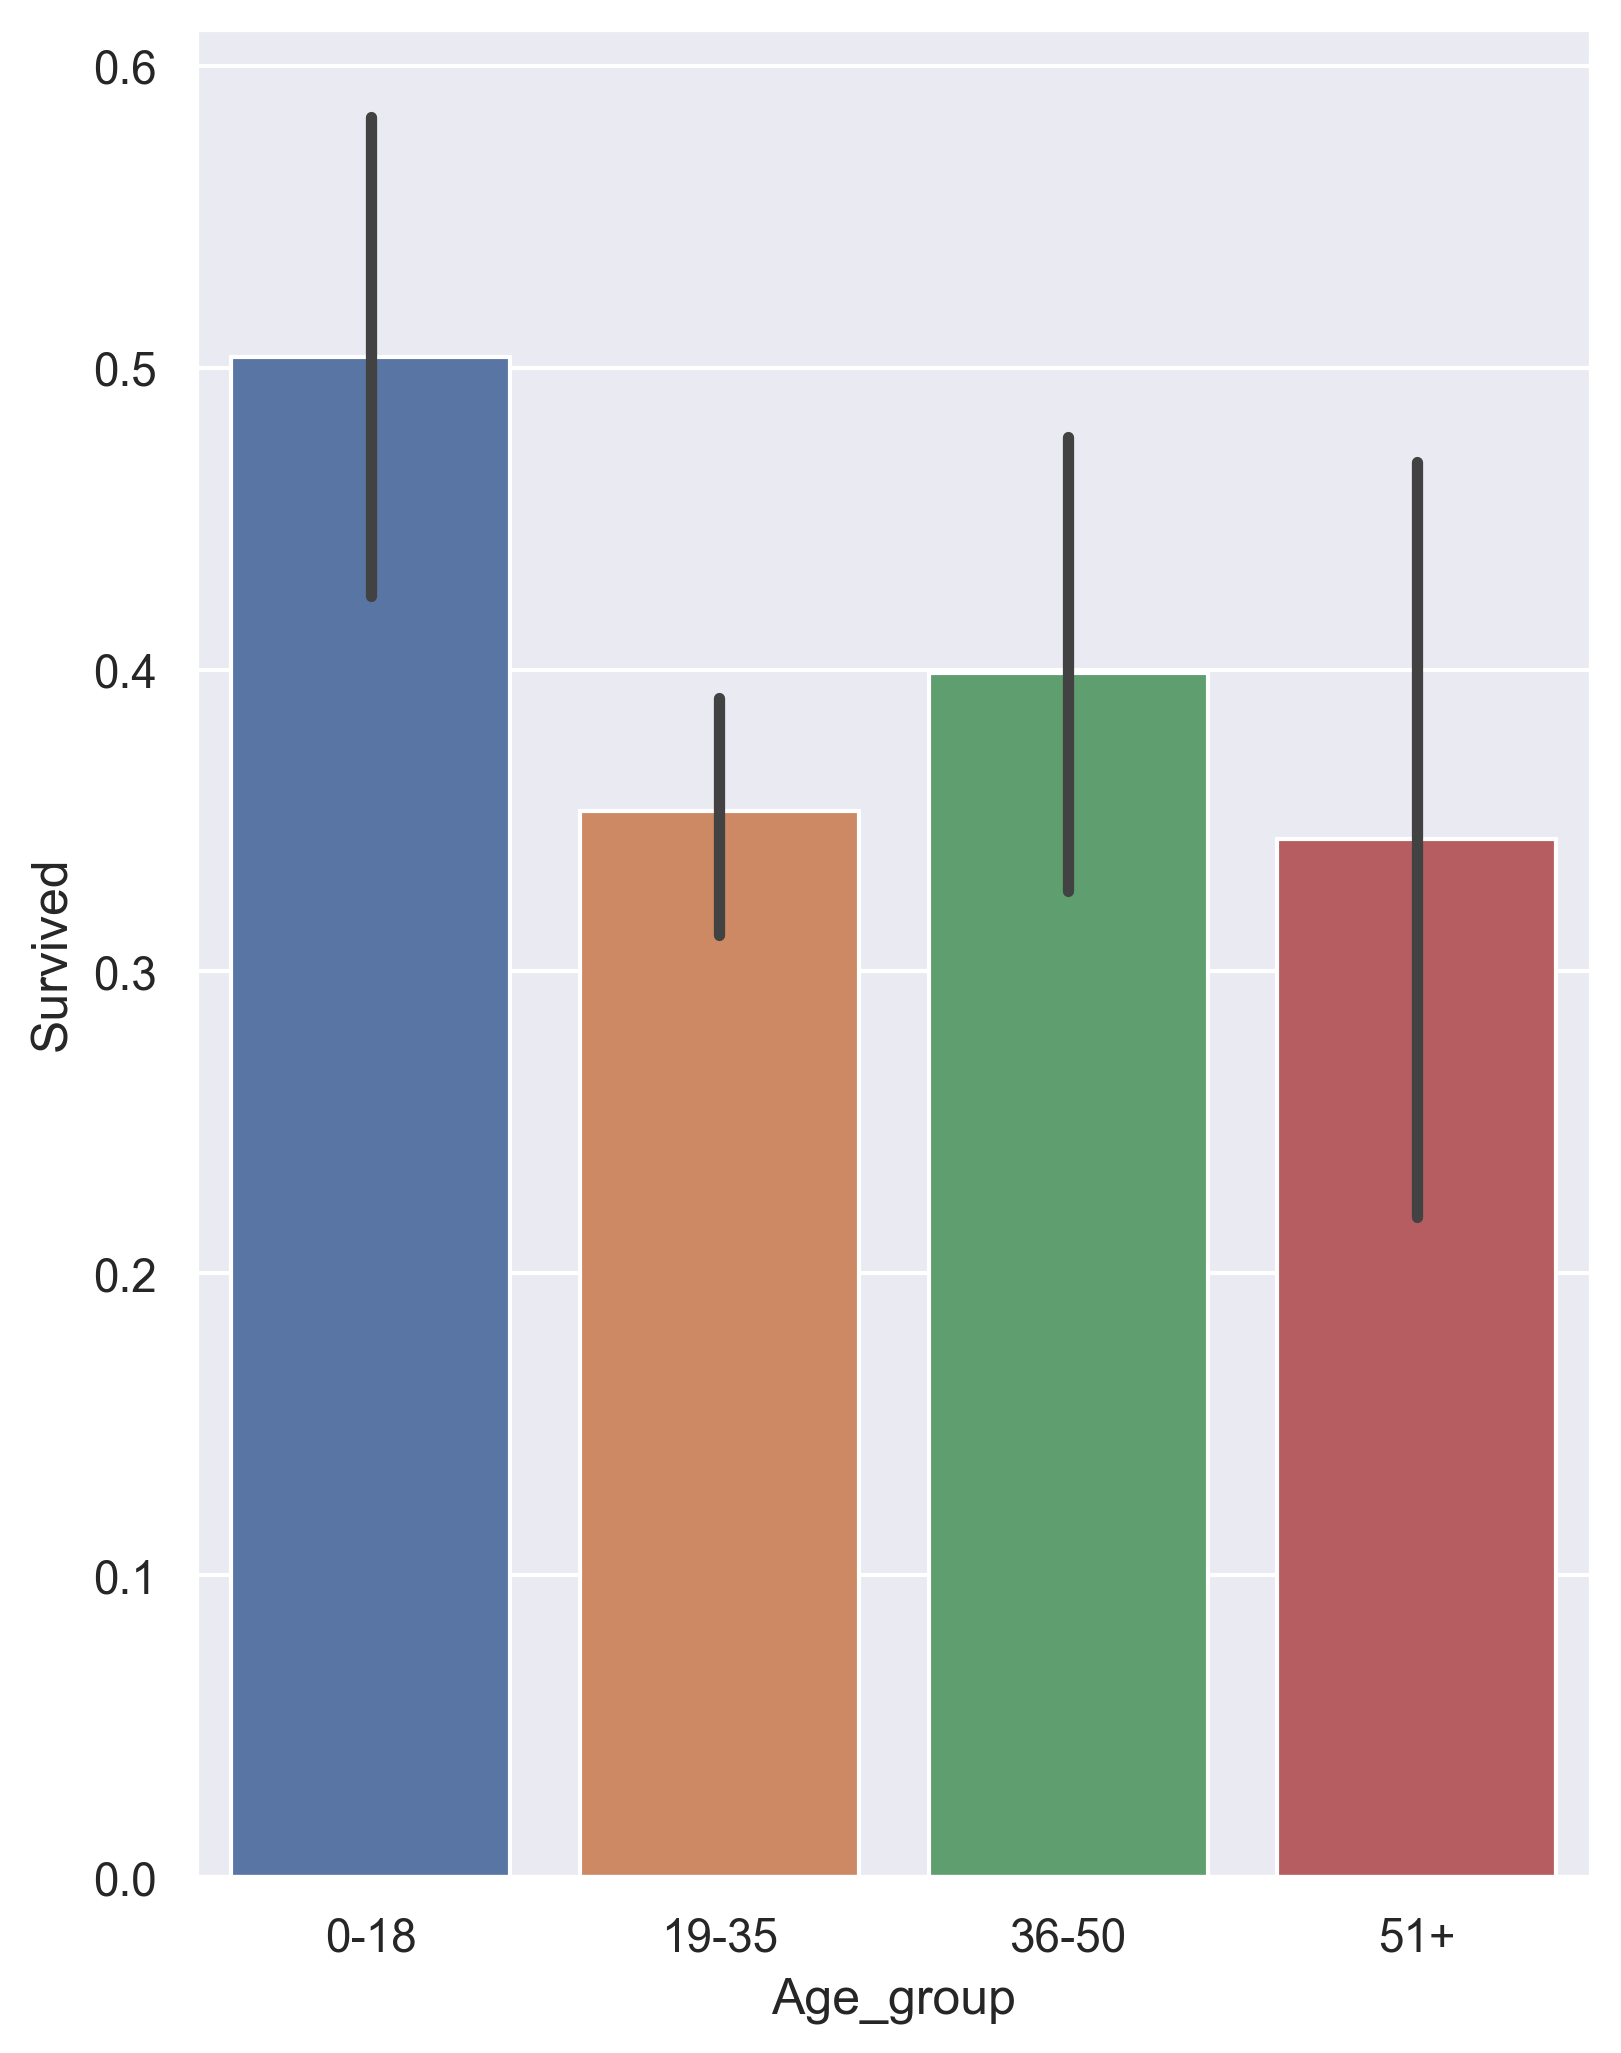

In [17]:
sns.barplot(x='Age_group',y='Survived',data=dataset)
plt.show()

## Data Manipulation

In [18]:
titanic_data = pd.get_dummies(dataset, columns=['Sex', 'Embarked'], drop_first=True)
titanic_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_group,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,19-35,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,36-50,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,19-35,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,19-35,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,19-35,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,B96 B98,19-35,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,19-35,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,B96 B98,19-35,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,19-35,1,0,0


# Model Building

In [19]:
x = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin','Age_group'], axis=1)
y = titanic_data['Survived']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

## Logistic Regression

In [21]:
log = LogisticRegression()

In [22]:
log.fit(xtrain,ytrain)

LogisticRegression()

In [23]:
#score of model on Test and the train
log_test = (log.score(xtest,ytest))
log_train = (log.score(xtrain,ytrain))

In [24]:
print(log_test,log_train)

0.8156424581005587 0.7949438202247191


In [25]:
y_pred = log.predict(xtest)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [26]:
confusion_matrix(ytest,y_pred)

array([[93, 13],
       [20, 53]], dtype=int64)

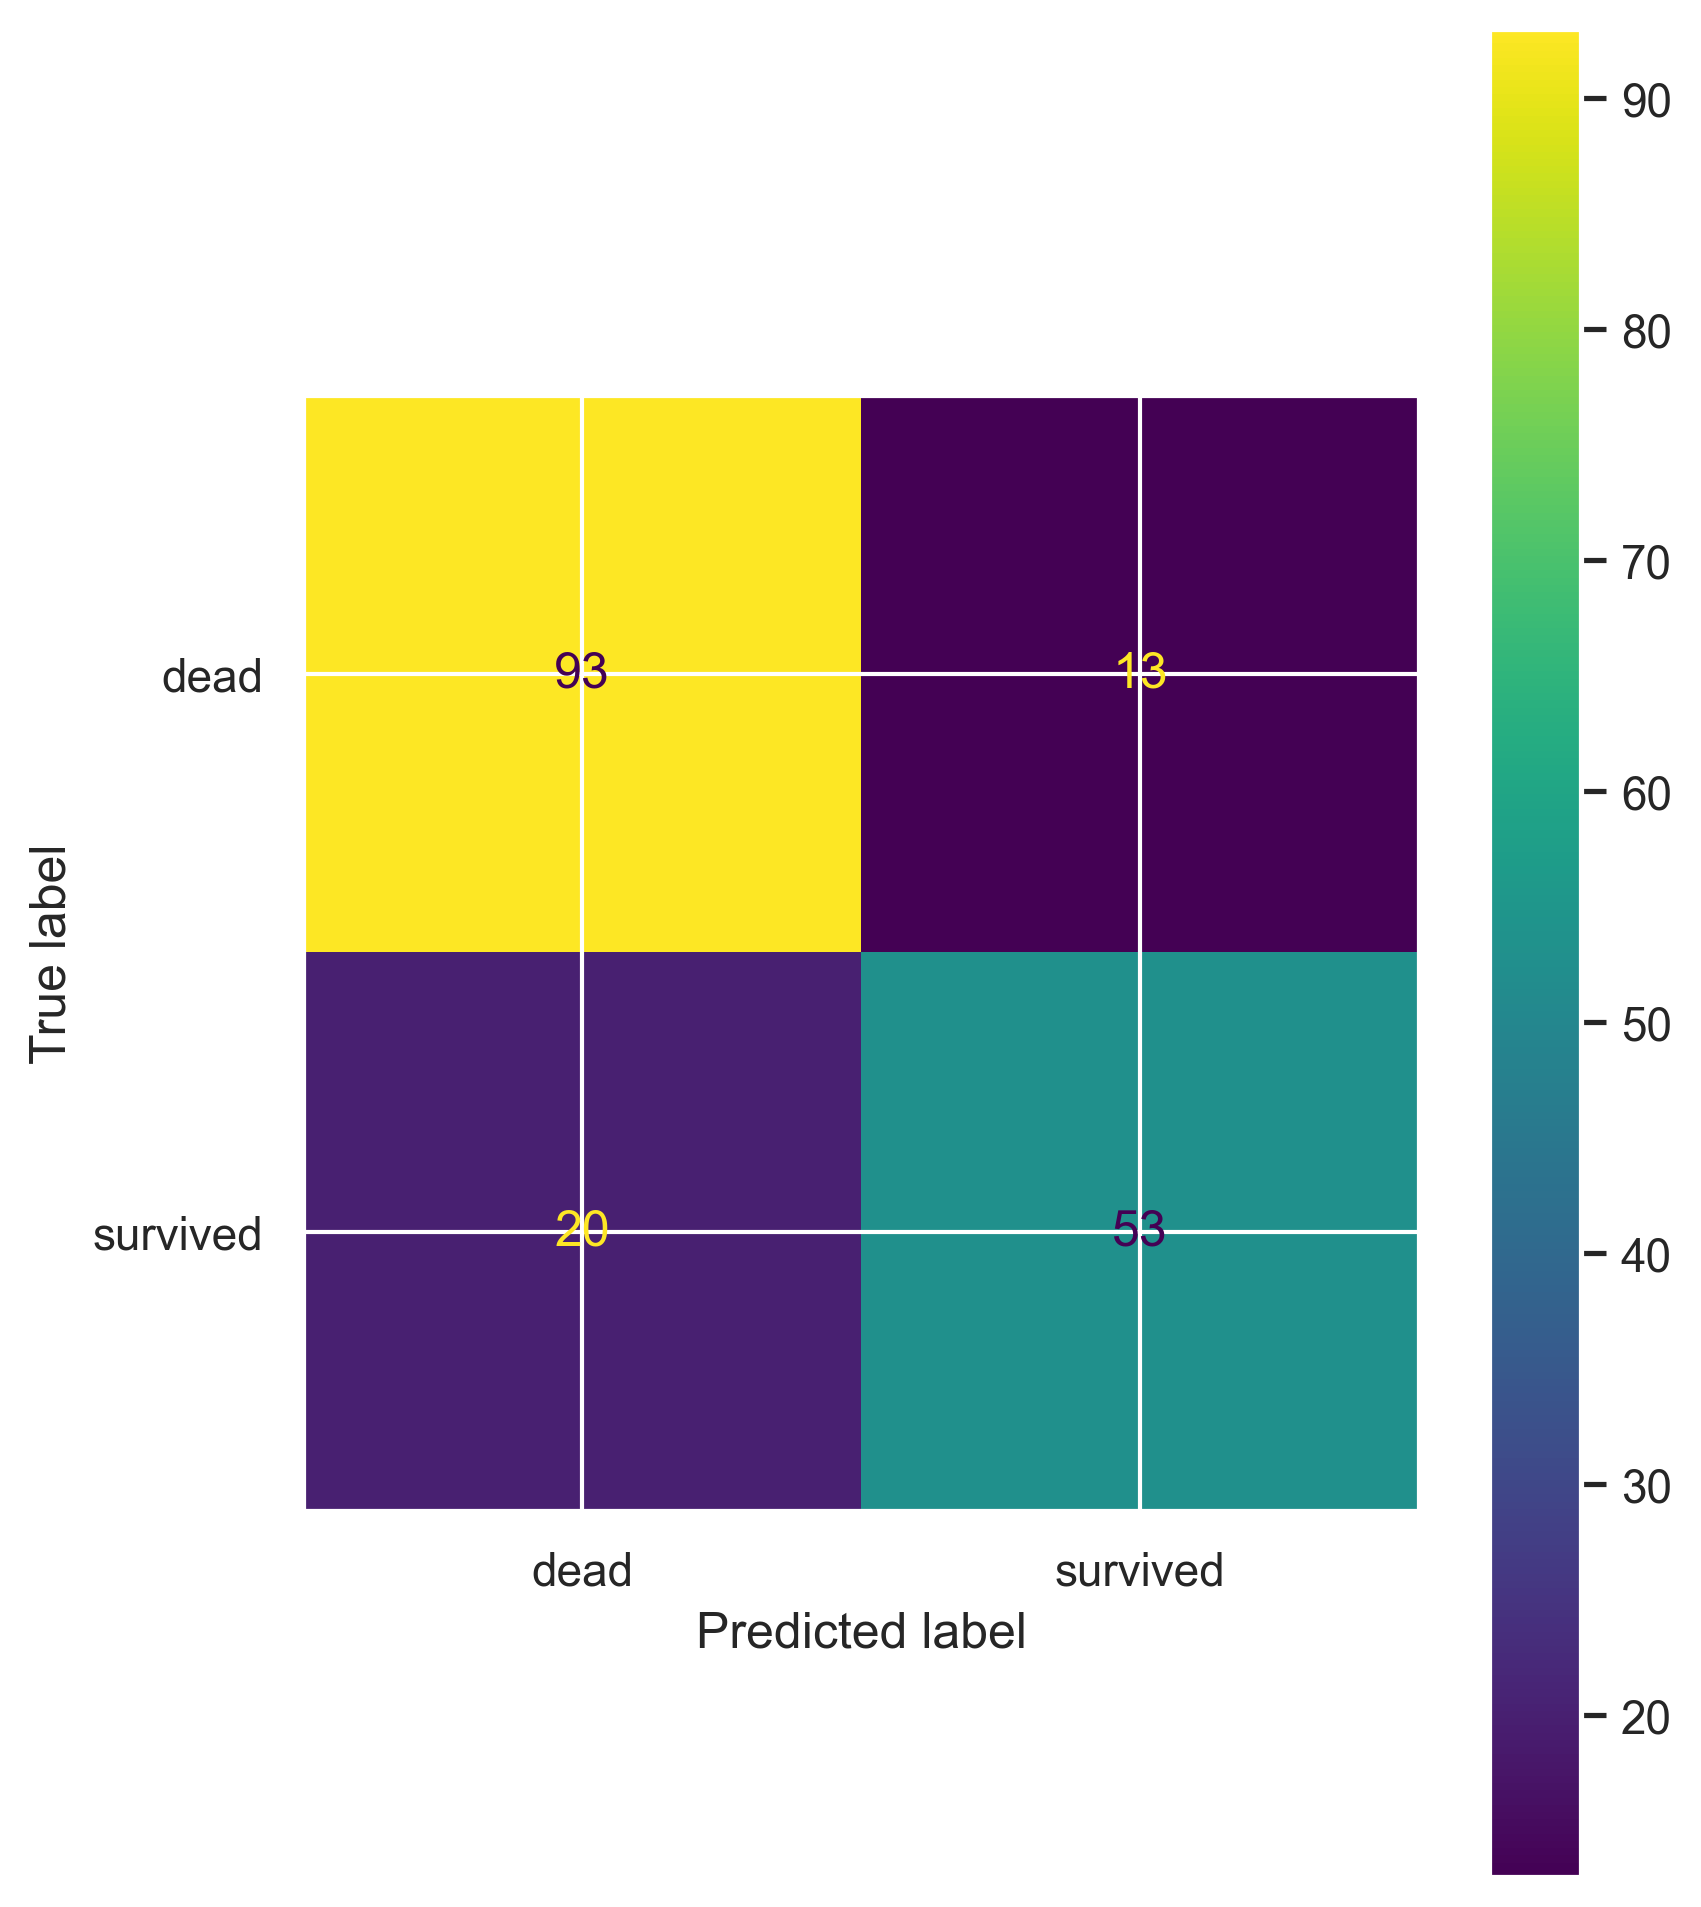

In [27]:
ConfusionMatrixDisplay.from_predictions(ytest, y_pred, display_labels = ['dead', 'survived'])

In [28]:
print(classification_report(ytest, y_pred, target_names = ['dead', 'survived']))

              precision    recall  f1-score   support

        dead       0.82      0.88      0.85       106
    survived       0.80      0.73      0.76        73

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



## Decision Trees

In [29]:
dt_model = DecisionTreeClassifier()

In [30]:
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [31]:
y_pred = dt_model.predict(xtest)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [32]:
confusion_matrix(ytest,y_pred)

array([[91, 15],
       [25, 48]], dtype=int64)

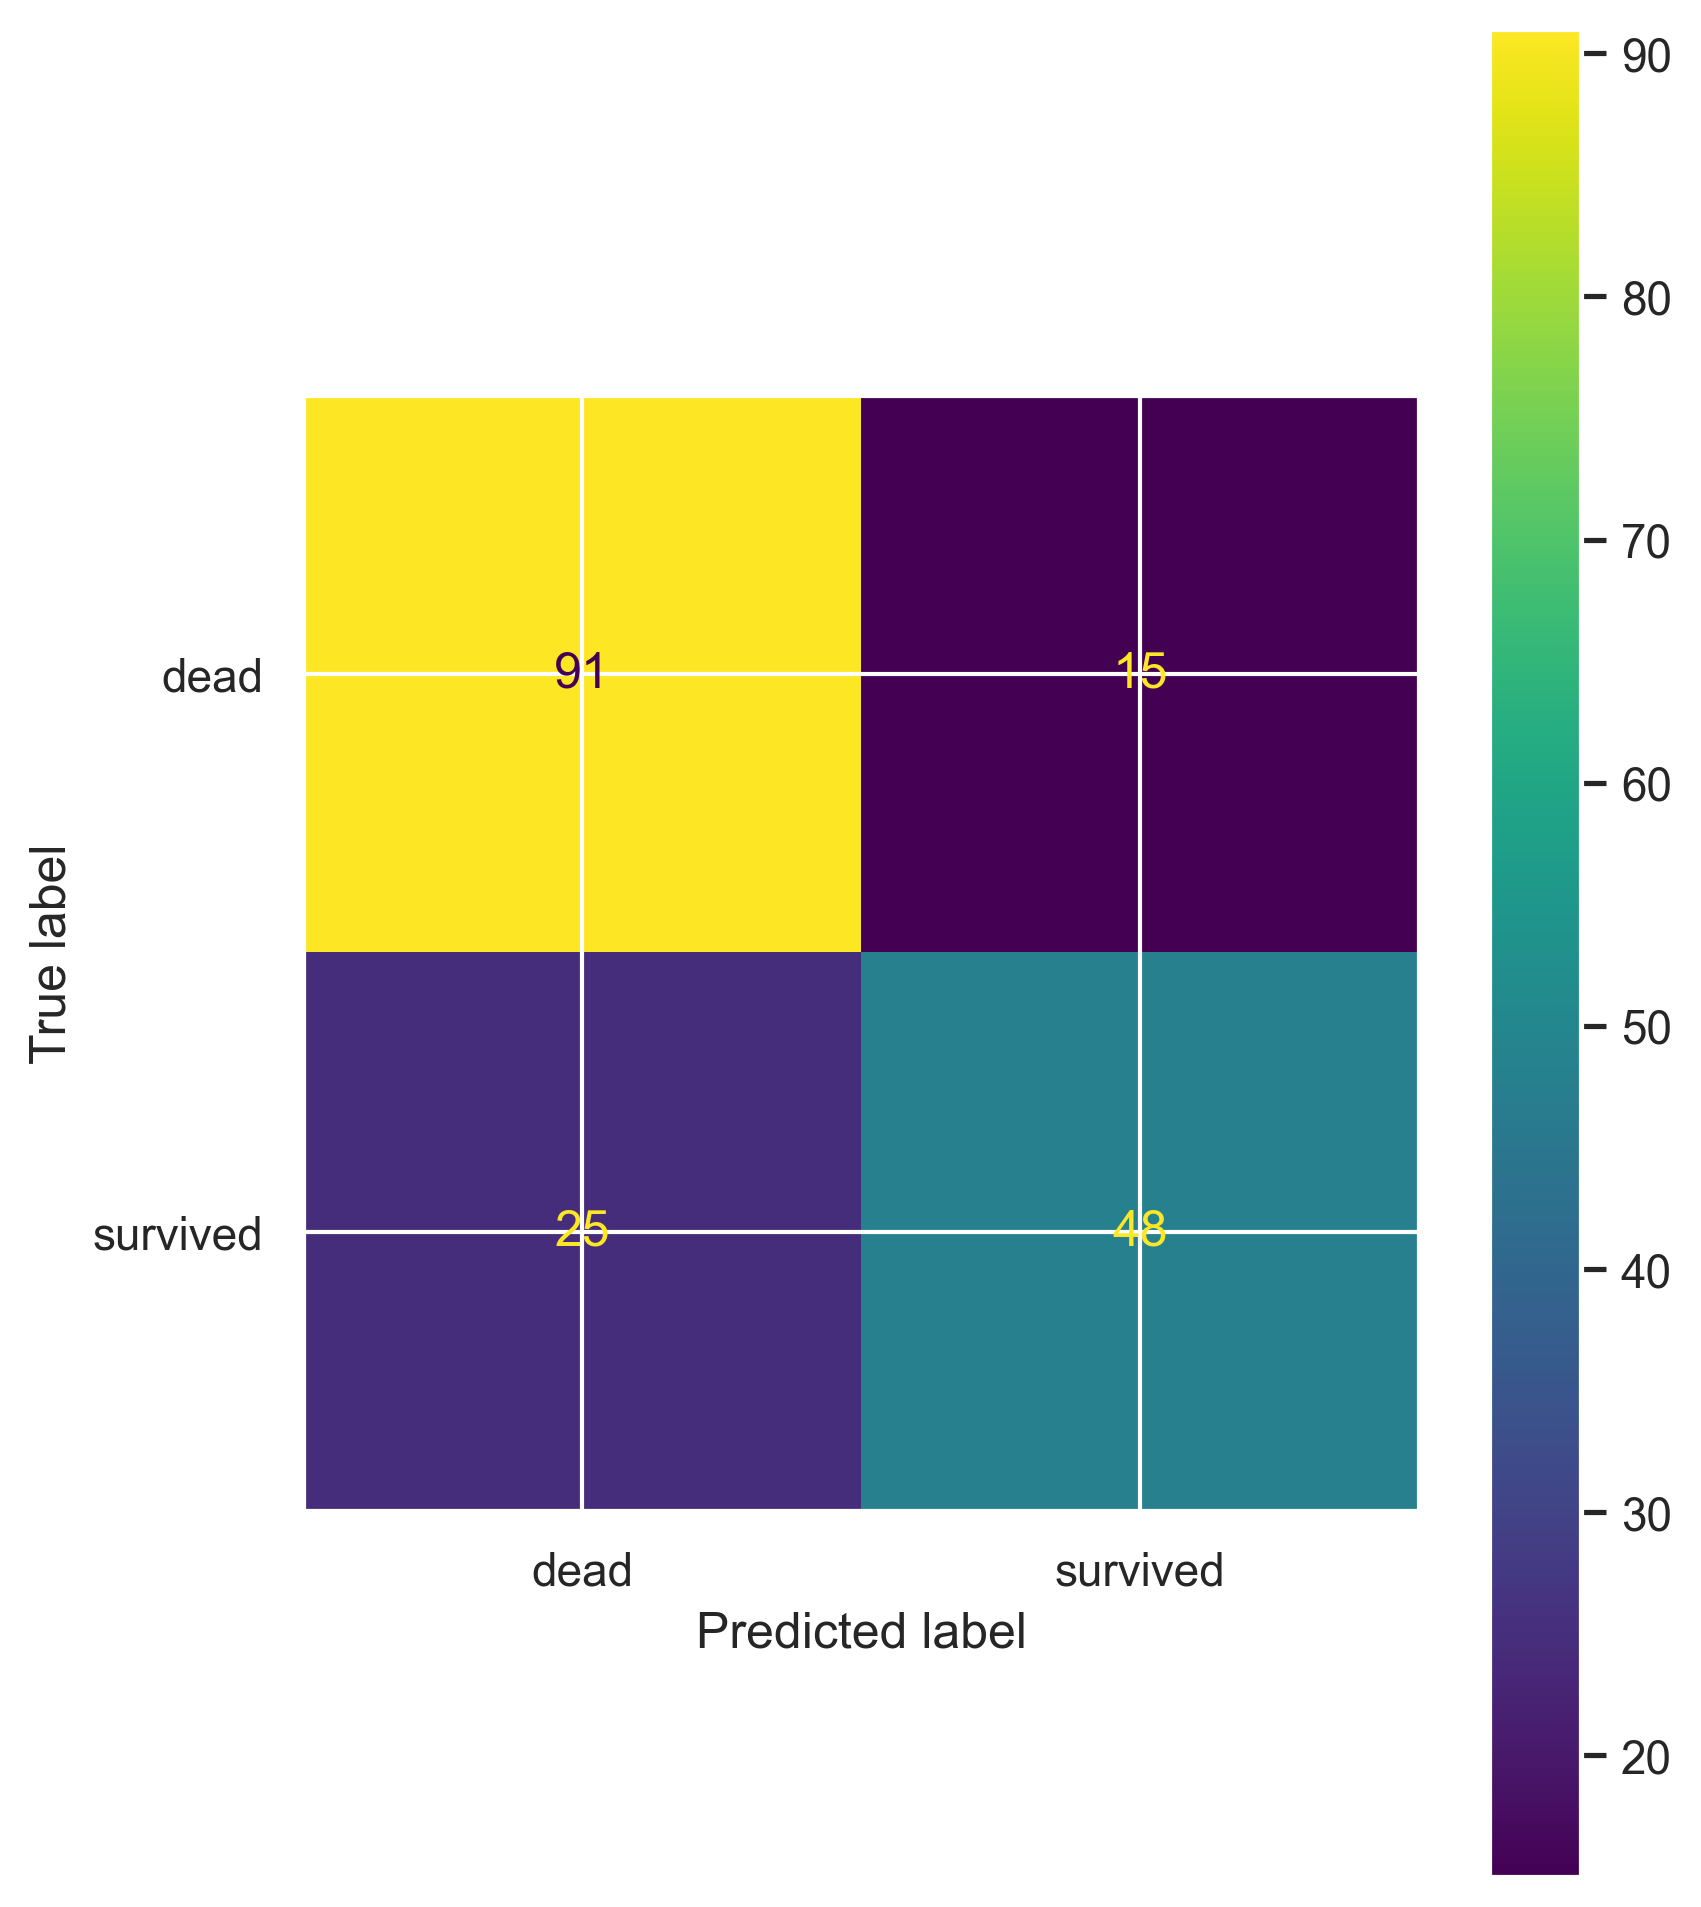

In [33]:
ConfusionMatrixDisplay.from_predictions(ytest, y_pred, display_labels = ['dead', 'survived'])

In [34]:
print(classification_report(ytest, y_pred, target_names = ['dead', 'survived']))

              precision    recall  f1-score   support

        dead       0.78      0.86      0.82       106
    survived       0.76      0.66      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179



In [35]:
dt_test = (dt_model.score(xtest,ytest))
dt_train = (dt_model.score(xtrain,ytrain))

In [36]:
print(dt_test,dt_train)

0.776536312849162 0.9873595505617978


[Text(0.5, 0.875, 'x[5] <= 0.5\nentropy = 0.956\nsamples = 712\nvalue = [443, 269]'),
 Text(0.25, 0.625, 'x[0] <= 2.5\nentropy = 0.828\nsamples = 249\nvalue = [65, 184]'),
 Text(0.125, 0.375, 'x[4] <= 28.856\nentropy = 0.288\nsamples = 139\nvalue = [7, 132]'),
 Text(0.0625, 0.125, 'entropy = 0.497\nsamples = 55\nvalue = [6, 49]'),
 Text(0.1875, 0.125, 'entropy = 0.093\nsamples = 84\nvalue = [1, 83]'),
 Text(0.375, 0.375, 'x[4] <= 23.35\nentropy = 0.998\nsamples = 110\nvalue = [58, 52]'),
 Text(0.3125, 0.125, 'entropy = 0.989\nsamples = 89\nvalue = [39, 50]'),
 Text(0.4375, 0.125, 'entropy = 0.454\nsamples = 21\nvalue = [19, 2]'),
 Text(0.75, 0.625, 'x[1] <= 13.0\nentropy = 0.688\nsamples = 463\nvalue = [378, 85]'),
 Text(0.625, 0.375, 'x[2] <= 2.5\nentropy = 0.938\nsamples = 31\nvalue = [11, 20]'),
 Text(0.5625, 0.125, 'entropy = 0.286\nsamples = 20\nvalue = [1, 19]'),
 Text(0.6875, 0.125, 'entropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Text(0.875, 0.375, 'x[0] <= 1.5\nentropy = 0.

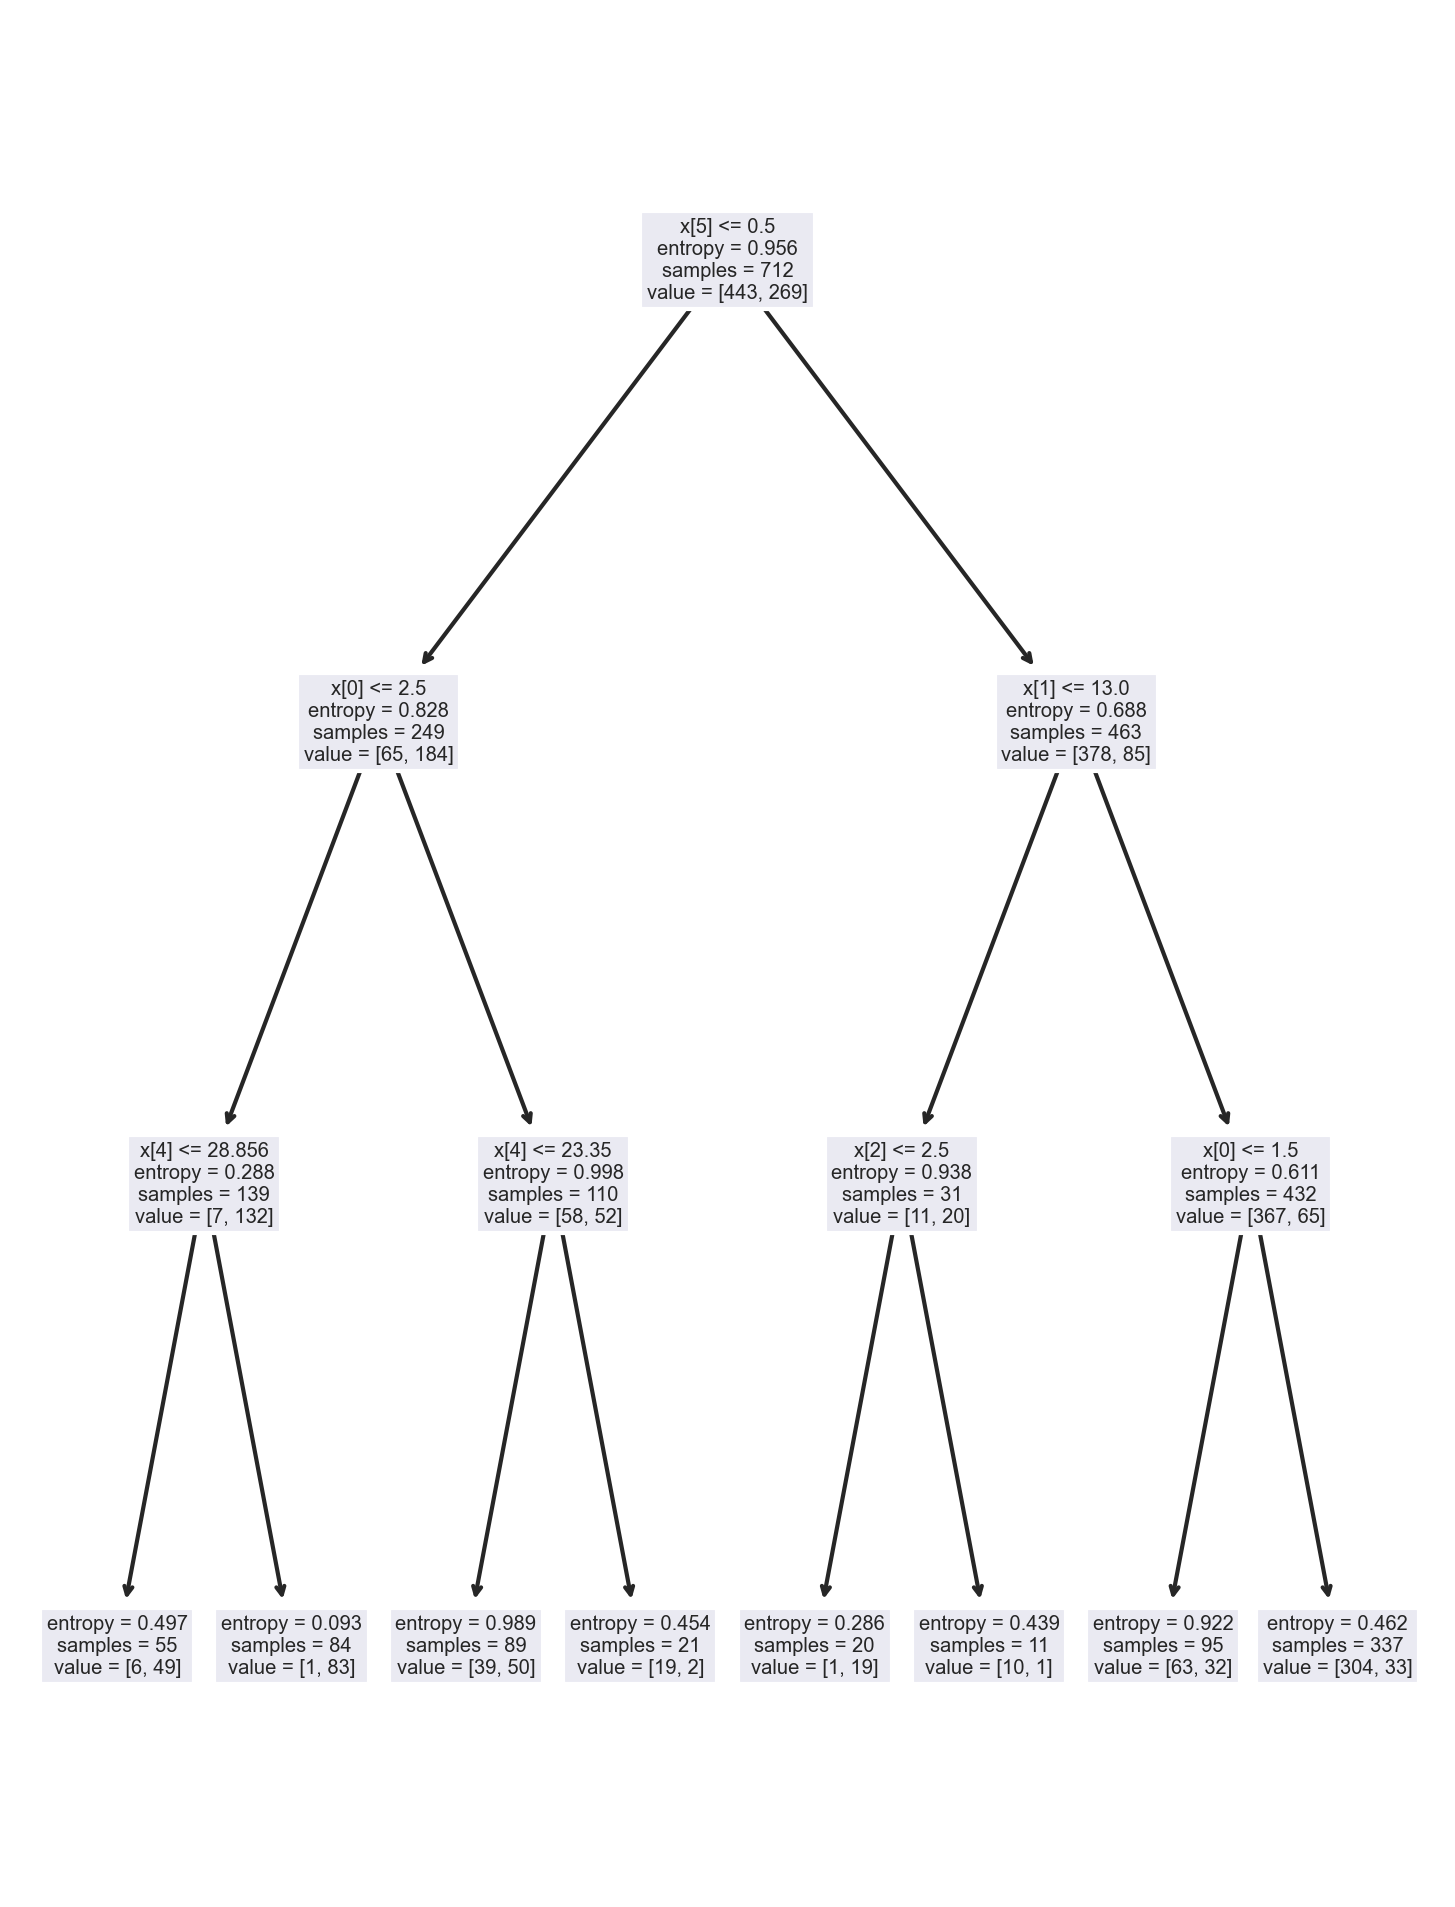

In [37]:
model1 = DecisionTreeClassifier(criterion='entropy',max_depth=3) 
model1.fit(xtrain,ytrain)
tree.plot_tree(model1)

## Random Forest

In [38]:
clf = RandomForestClassifier()

In [39]:
clf.fit(xtrain,ytrain)

RandomForestClassifier()

In [40]:
y_pred = clf.predict(xtest)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [41]:
confusion_matrix(ytest, y_pred)

array([[92, 14],
       [26, 47]], dtype=int64)

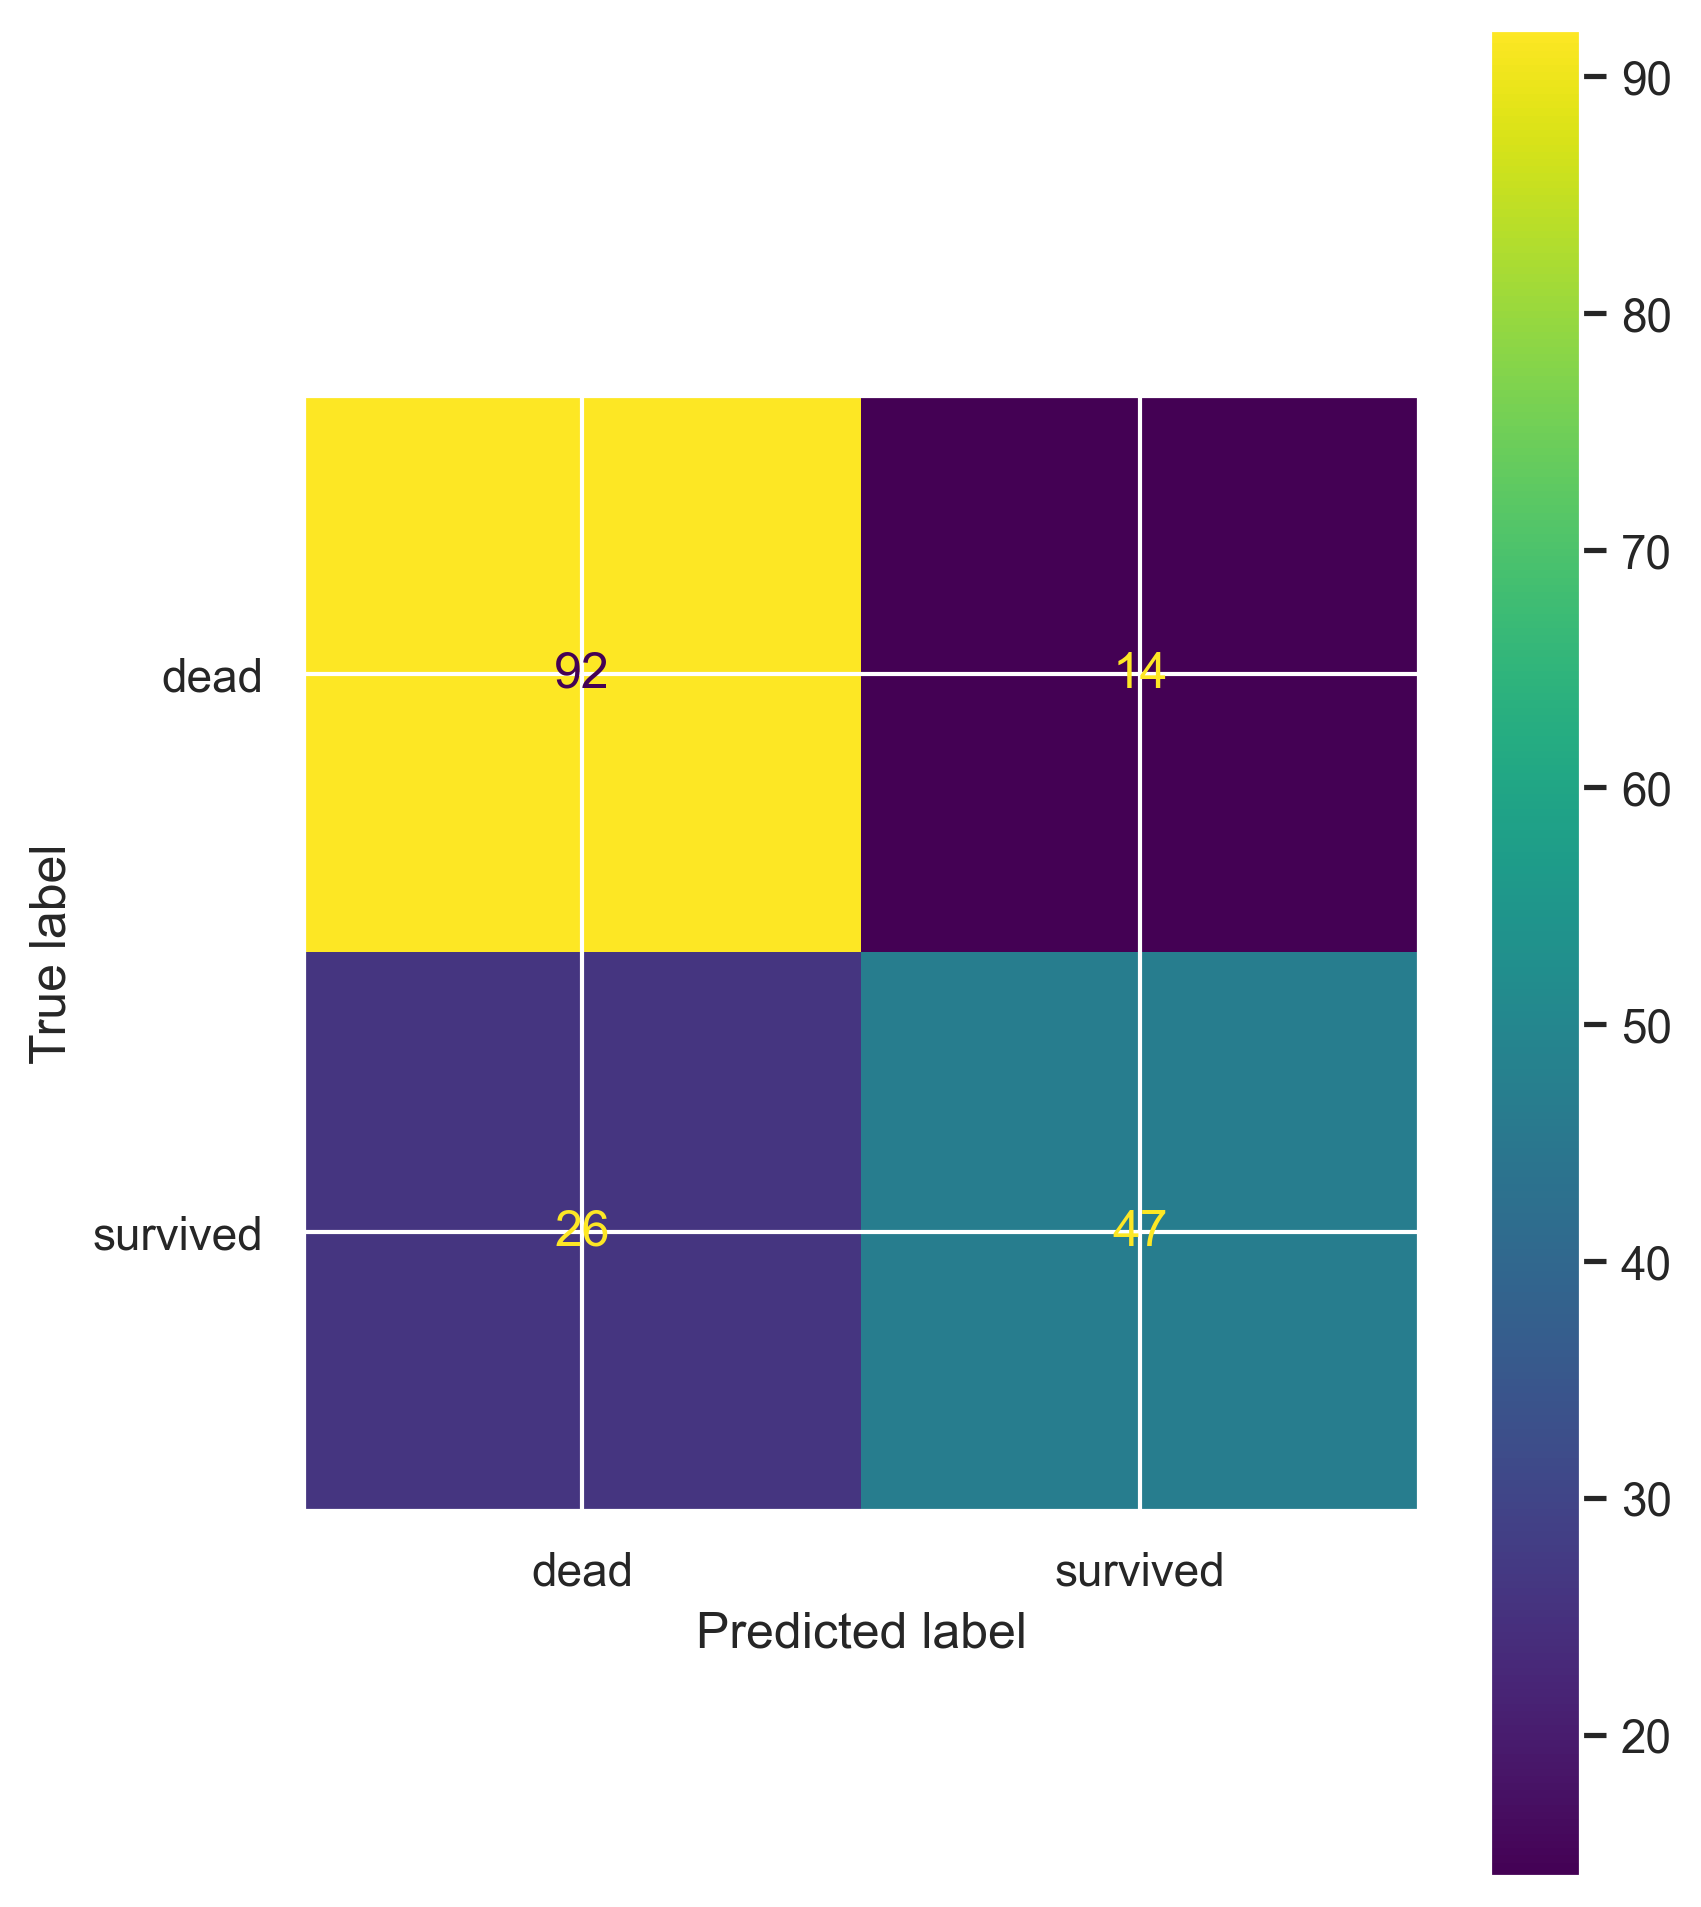

In [42]:
ConfusionMatrixDisplay.from_predictions(ytest, y_pred, display_labels = ['dead', 'survived'])

In [43]:
print(classification_report(ytest, y_pred, target_names = ['dead', 'survived']))

              precision    recall  f1-score   support

        dead       0.78      0.87      0.82       106
    survived       0.77      0.64      0.70        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179



In [44]:
clf_test = (clf.score(xtest,ytest))
clf_train = (clf.score(xtrain,ytrain))

In [45]:
print(clf_test,clf_train)

0.776536312849162 0.9873595505617978


## XGBoost

In [46]:
xgb = XGBClassifier()

In [47]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
y_pred = xgb.predict(xtest)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [49]:
confusion_matrix(ytest, y_pred)

array([[97,  9],
       [29, 44]], dtype=int64)

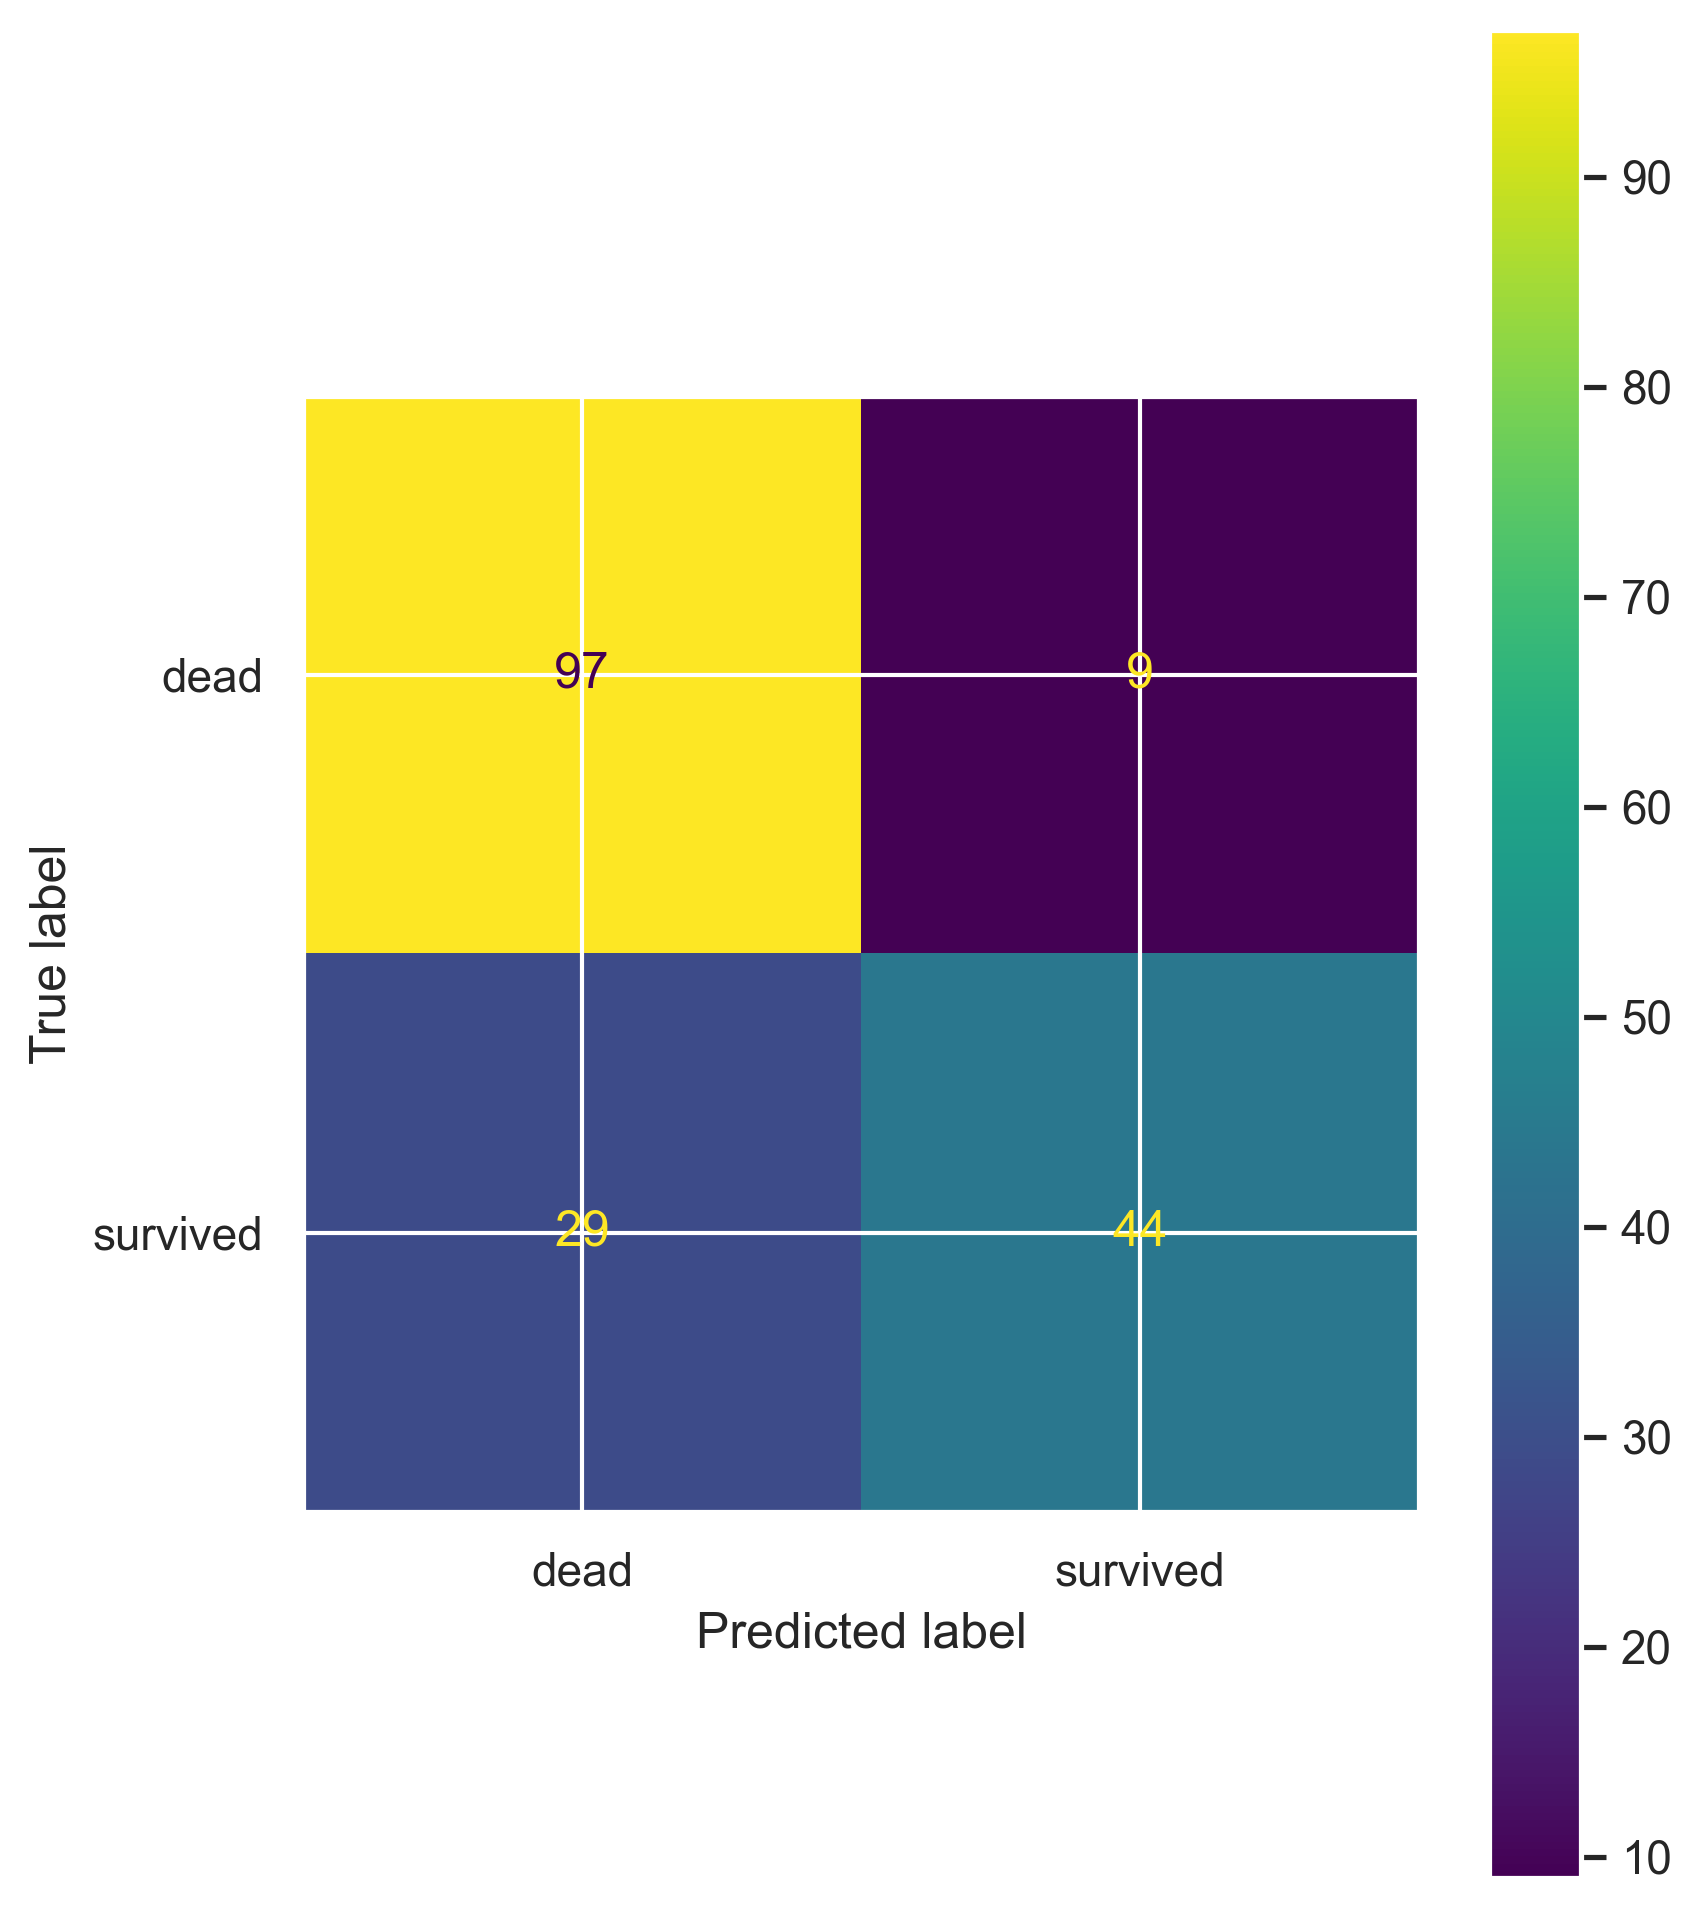

In [50]:
ConfusionMatrixDisplay.from_predictions(ytest, y_pred, display_labels = ['dead', 'survived'])

In [51]:
print(classification_report(ytest, y_pred, target_names = ['dead', 'survived']))

              precision    recall  f1-score   support

        dead       0.77      0.92      0.84       106
    survived       0.83      0.60      0.70        73

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [52]:
xgb_test = (xgb.score(xtest,ytest))
xgb_train = (xgb.score(xtrain,ytrain))

In [53]:
print(xgb_test,xgb_train)

0.7877094972067039 0.9719101123595506


## Comparing the Various Models

In [54]:
data = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forests',"XGBoost"],
    ' Test Accuracies': [log_test, dt_test, clf_test,xgb_test],
    ' Train Accuracies': [log_train, dt_train, clf_train,xgb_train]
    }

accuracy_table = pd.DataFrame(data)

In [55]:
accuracy_table

,Model,Test Accuracies,Train Accuracies
0,Logistic Regression,0.815642,0.794944
1,Decision Trees,0.776536,0.987360
2,Random Forests,0.776536,0.987360
3,XGBoost,0.787709,0.971910


In [56]:
## The Logistic Regression Model provides the best and consistent test and train accuracies